# 图像分割和提取

在图像处理的过程中，经常需要从图像中将前景对象作为目标图像分割或者提取出来。

# 原理

任何一幅灰度图像，都可以被看作是地理学上的地形表面，灰度值高的区域可以被看成是山峰，灰度值低的区域可以被看成是山谷。

如果我们向每一个山谷中“灌注”不同颜色的水，那么，随着水位不断地升高，不同山谷的水就会汇集到一起。在这个过程中，为了防止不同山谷的水交汇，我们需要在水流可能汇合的地方构建堤坝。该过程将图像分成两个不同的集合：集水盆地和分水岭线。我们构建的堤坝就是分水岭线，也即对原始图像的分割。这就是分水岭算法。

为了改善图像分割效果，人们提出了基于掩模的改进的分水岭算法。改进的分水岭算法允许用户将他认为是同一个分割区域的部分标注出来（被标注的部分就称为掩模）。

# cv2.watershed函数

在OpenCV中，可以使用函数cv2.watershed()实现分水岭算法。在具体的实现过程中，还需要借助于形态学函数、距离变换函数cv2.distanceTransform()、cv2.connectedComponents()来完成图像分割。

## 距离变换函数 distanceTransform

但是如果图像内的子图连接在一起时，就很难确定前景对象了。此时，借助于距离变换函数cv2.distanceTransform()可以方便地将前景对象提取出来。

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(-0.5, 1999.5, 1999.5, -0.5)

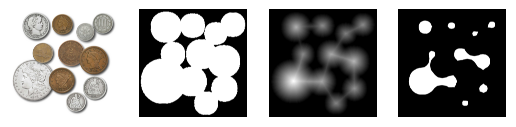

In [45]:
img = cv2.imread('images/coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((3, 3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
opening = cv2.erode(opening, (100, 100), iterations=2)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, fore = cv2.threshold(dist_transform, 0.4 * dist_transform.max(), 255, 0)

plt.figure('reesult')
plt.subplot(141)
plt.imshow(img)
plt.axis('off')
plt.subplot(142)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.subplot(143)
plt.imshow(dist_transform, cmap='gray')
plt.axis('off')
plt.subplot(144)
plt.imshow(fore, cmap='gray')
plt.axis('off')

## 分水岭算法代码参考

(-0.5, 251.5, 311.5, -0.5)

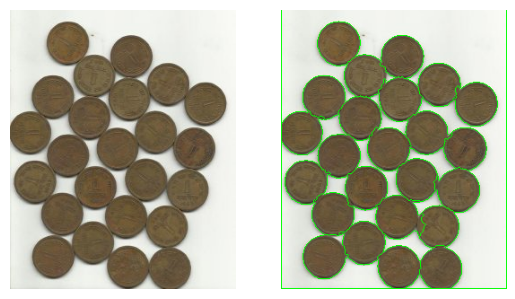

In [51]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('images/coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ishow=img.copy()
ret, thresh = cv2.threshold(gray,0,255,
                            cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [0,255,0]
plt.subplot(121)
plt.imshow(ishow)
plt.axis('off')
plt.subplot(122)
plt.imshow(img)
plt.axis('off')

# 交互式前景提取

我理解的算法原理：
* 根据框选外的图片信息确定框内的前景和背景
* 根据用户输入学习并创建新的分类标准

## 示例

![](images/grabCut.jpg)

## opencv函数

在OpenCV中，实现交互式前景提取的函数是cv2.grabCut()。

其他的用到再说。